#ЛР №6

Основные понятия ООП. Инкапсуляция. Классы. Декораторы.

##Основная задача "Эксперимент"

Нужно написать класс "Эксперимент", который производит работу с данными.

Вы получили данные в виде словаря. Словарь имеет следующую структуру {'date': '2023-01-05', 'signal': 'path_to_ecg_signal', 'parameters':{}}

**Интерфейс**

Нужно написать класс, где должны поддерживаться следующие методы:

* _конструктор_ — принимает словарь и создает соответствующие поля (self.data, self.path_signal, self.parameters)
* `get_datе()` — возвращает дату записи сигнала.
* `get_signal_length()` — возвращает длину сигнала.
* `plot_signal()` — выводит график сигнала.
* `_signal_filtration(signal, filtration_parametres)` — производит фильтрацию сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _signal_filtration и _signal_find_peak.
* `get_RR_statistics()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде словаря).
В этом методе вызывается метод _calculate_RR_intervals.


*можно добавить свои методы






In [ ]:
!pip install wfdb heartpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks

2023-01-05
20000


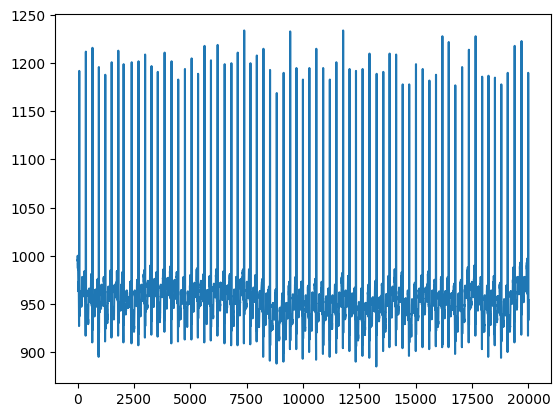

None
{'среднее': 288.6231884057971, 'std': 31.077323597890175, 'min': 66, 'max': 358}


In [ ]:
class Experiment():

  def __init__(self, value):
    self.date = value['date']
    self.path_signal = value['signal']
    self.parameters = value['parameters']
    df = pd.read_csv(self.path_signal)
    self.signal = df['MLII']

  def get_date(self):
    return self.date

  def get_data_length(self):
    return len(self.signal)

  def plot_signal(self):
    plt.plot(self.signal)
    plt.show()

  @staticmethod
  def _signal_filtration(signal, filtration_parametres):
    filtered = hp.filter_signal(signal, **filtration_parametres)
    return filtered

  @staticmethod
  def _signal_find_peaks(signal, peaks_parametres):
    peaks, _ = find_peaks(signal, **peaks_parametres)
    return peaks

  def _calculate_RR_intervals(self):
    filtered = self._signal_filtration(self.signal, self.parameters['filtration_parametres'])
    rr = self._signal_find_peaks(filtered, self.parameters['peaks_parametres'])
    calc_rr = []
    for i in range (1, len(rr)):
      calc_rr.append(rr[i]-rr[i-1])
    return calc_rr

  def get_RR_statistics(self):
    calc_rr = self._calculate_RR_intervals()
    stat = {'среднее':0, 'std':0, 'min':0, 'max':0}
    stat['среднее'] = np.mean(calc_rr)
    stat['std'] = np.std(calc_rr)
    stat['min'] = np.min(calc_rr)
    stat['max'] = np.max(calc_rr)
    return stat

data = {'date':'2023-01-05', 'signal':'/content/drive/MyDrive/ecg.csv',
     'parameters':{
         'filtration_parametres': {
             'cutoff': [0.75, 3.5],
             'sample_rate':100,
             'order': 3,
             'filtertype':'bandpass'
             },
         'peaks_parametres': {
             'height':20
             }
         }
     }

ex = Experiment(data)
print(ex.get_date())
print(ex.get_data_length())
print(ex.plot_signal())
print(ex.get_RR_statistics())

##Задача ** "Минигольф"

https://drive.google.com/drive/folders/1yT0TuqoQuLhPgGFZl-uUjVq8iKFAGGpX?usp=drive_link